## Importing Libraries

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Reading the Data 

In [2]:
data = pd.read_csv(r'appstore_games (2).csv')
print(data.shape)
data.head(3)

(17007, 18)


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017


## Dropping Irrelevant Columns

In [3]:
data.drop(['URL', 'ID', 'Icon URL'], axis = 1, inplace = True)
print(data.shape)
data.head(3)

(17007, 15)


,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017


## Exploring and Modifying the Data

**Number of Non-NA values in the dataframe**

In [4]:
data.count()

Name                            17007
Subtitle                         5261
Average User Rating              7561
User Rating Count                7561
Price                           16983
In-app Purchases                 7683
Description                     17007
Developer                       17007
Age Rating                      17007
Languages                       16947
Size                            17006
Primary Genre                   17007
Genres                          17007
Original Release Date           17007
Current Version Release Date    17007
dtype: int64

**Deleting rows whose prices are NA**

In [5]:
data.dropna(axis = 0, how = 'any', subset = ['Price'], inplace = True)
data.reset_index(drop = True, inplace = True)
print(data.shape)
data.head(3)

(16983, 15)


,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017


In [6]:
data.count()

Name                            16983
Subtitle                         5241
Average User Rating              7561
User Rating Count                7561
Price                           16983
In-app Purchases                 7671
Description                     16983
Developer                       16983
Age Rating                      16983
Languages                       16923
Size                            16983
Primary Genre                   16983
Genres                          16983
Original Release Date           16983
Current Version Release Date    16983
dtype: int64

**Checking the occurance of NA values in Avg Rating and Rating Count**

In [7]:
data[data['Average User Rating'].isna()]

,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
10,Quaddraxx,NaN,NaN,NaN,0.00,NaN,Quaddraxx-Logic \u2013 Challenge your brain!\n...,H2F Informationssysteme GmbH,4+,EN,3089867.0,Games,"Games, Entertainment, Strategy, Puzzle",11/08/2008,30/09/2008
22,Ane Rouge,NaN,NaN,NaN,0.00,NaN,Your Goal is to make leave the red square towa...,Jean-Francois Pautex,4+,"EN, FR",1190912.0,Games,"Games, Puzzle, Education, Strategy",27/09/2008,8/03/2017
23,Neiscat,NaN,NaN,NaN,0.99,NaN,"Neiscat is an original strategy game, where yo...",Frederic Bronner,4+,"EN, FR",8806400.0,Games,"Games, Board, Entertainment, Strategy",29/09/2008,23/12/2018
56,Shogi Kifu,NaN,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,Games,"Games, Strategy, Board",14/07/2011,13/10/2018
57,Shogi Kifu,NaN,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,Games,"Games, Strategy, Board",14/07/2011,13/10/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16978,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
16979,EachOther,NaN,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
16980,Rabbit Vs Tortoise,NaN,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
16981,FaTaLL,Most fun game!!!,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


Clearly, the NaN values of 'Average User Rating' and 'User Rating Count' occur together.

## Relation between Avg Rating and Price

**Variation of Average User Rating**

In [8]:
print("MAX RATING: ", max(data['Average User Rating']))
print("MIN RATING: ", min(data['Average User Rating']))
print("MEAN RATING: ", np.nanmean(data['Average User Rating']))
print("MEDIAN RATING: ", np.nanmedian(data['Average User Rating']))
print("MODE RATING: ", scipy.stats.mode(data['Average User Rating']))

MAX RATING:  5.0
MIN RATING:  1.0
MEAN RATING:  4.06090464224309
MEDIAN RATING:  4.5
MODE RATING:  ModeResult(mode=array([4.5]), count=array([2861]))


**Variation of Price**

In [9]:
print("MAX PRICE: ", max(data['Price']))
print("MIN PRICE: ", min(data['Price']))
print("MEAN PRICE: ", np.nanmean(data['Price']))
print("MEDIAN PRICE: ", np.nanmedian(data['Price']))
print("MODE PRICE: ", scipy.stats.mode(data['Price']))

MAX PRICE:  179.99
MIN PRICE:  0.0
MEAN PRICE:  0.8134187128304776
MEDIAN PRICE:  0.0
MODE PRICE:  ModeResult(mode=array([0.]), count=array([14212]))


**Price vs Avg Rating**

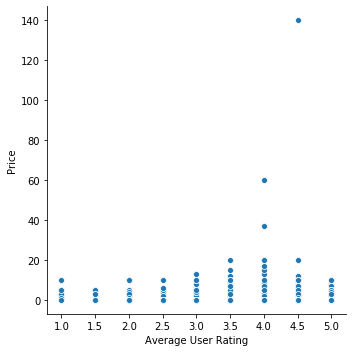

In [10]:
sns.relplot(x = 'Average User Rating', y = 'Price', data = data)
plt.show()

**Clipping the Price**

In [11]:
data['Price'].clip(upper = 20, inplace = True)

**Clipped Price vs Avg Rating**

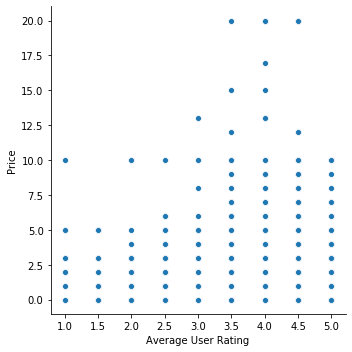

In [12]:
sns.relplot(x = 'Average User Rating', y = 'Price', data = data)
plt.show()

From both the plots (Price vs Avg Rating and Clipped Price vs Avg Rating), it is clear that apps with an average rating of between 3.5 and 4.5 tend to have the highest price. 

## Relation between Rating Count and Price

**Variation of Average User Rating**

In [13]:
print("MAX RATING COUNT: ", max(data['User Rating Count']))
print("MIN RATING COUNT: ", min(data['User Rating Count']))
print("MEAN RATING COUNT: ", np.nanmean(data['User Rating Count']))
print("MEDIAN RATING COUNT: ", np.nanmedian(data['User Rating Count']))
print("MODE RATING COUNT: ", scipy.stats.mode(data['User Rating Count']))

MAX RATING COUNT:  3032734.0
MIN RATING COUNT:  5.0
MEAN RATING COUNT:  3306.5312789313584
MEDIAN RATING COUNT:  46.0
MODE RATING COUNT:  ModeResult(mode=array([5.]), count=array([390]))


**Variation of Clipped Price**

In [14]:
print("MAX PRICE: ", max(data['Price']))
print("MIN PRICE: ", min(data['Price']))
print("MEAN PRICE: ", np.nanmean(data['Price']))
print("MEDIAN PRICE: ", np.nanmedian(data['Price']))
print("MODE PRICE: ", scipy.stats.mode(data['Price']))

MAX PRICE:  20.0
MIN PRICE:  0.0
MEAN PRICE:  0.5134346110816699
MEDIAN PRICE:  0.0
MODE PRICE:  ModeResult(mode=array([0.]), count=array([14212]))


**Clipped Price vs Rating Count**

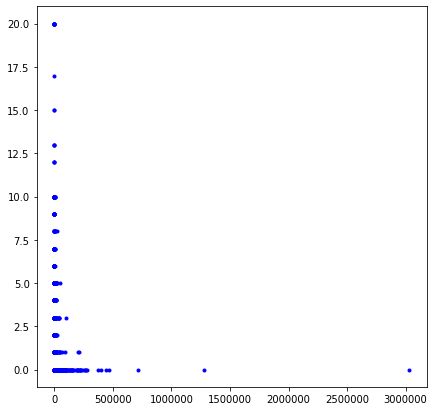

In [15]:
plt.figure(figsize = (7,7))
plt.plot(data['User Rating Count'], data['Price'], "b.")
plt.show()

**Clipping the Rating Count**

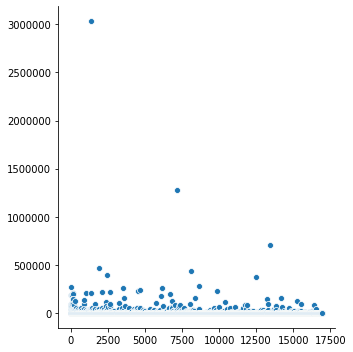

In [16]:
sns.relplot(data = data['User Rating Count'])
plt.show()

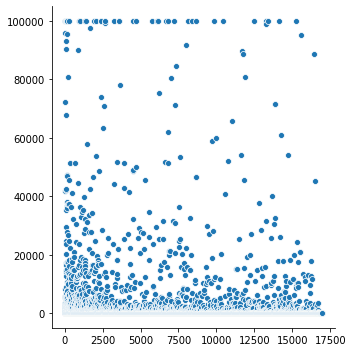

In [17]:
t = data['User Rating Count'].clip(upper = 100000)
sns.relplot(data = t)
plt.show()

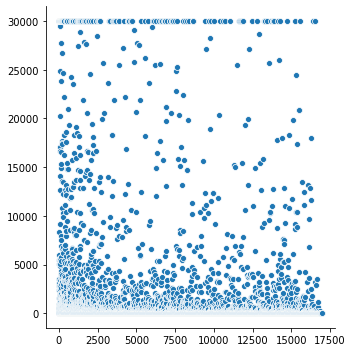

In [18]:
t = data['User Rating Count'].clip(upper = 30000)
sns.relplot(data = t)
plt.show()

In [19]:
data['User Rating Count'].clip(upper = 30000, inplace = True)

**Clipped Price vs Clipped Rating Count**

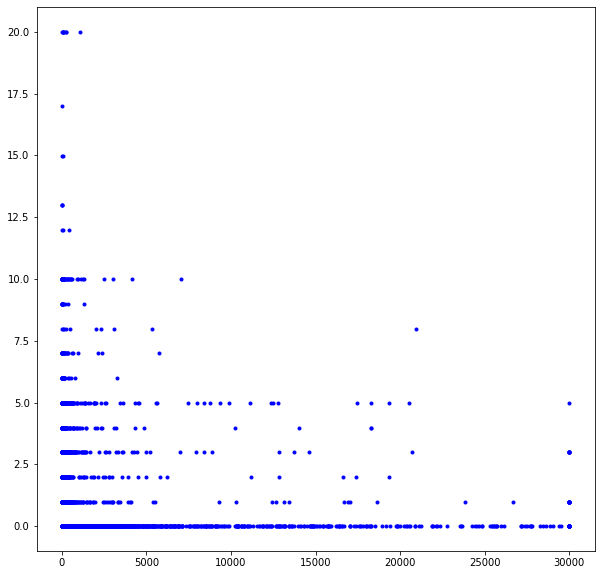

In [20]:
plt.figure(figsize = (10,10))
plt.plot(data['User Rating Count'], data['Price'], "b.")
plt.show()

From the above plot, it is clear that lower the price of the app, the higher is the number of user rating the app receives. 

## One-Hot Encoding the Genres

In [21]:
print(data.shape)
data.head(3)

(16983, 15)


,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017


**Getting the Unique Genres**

In [22]:
def one_hot_encode_df(df, col):
    items = list(data[col].str.split(", "))    
    unique_items = []
    for i in items:
        unique_items.extend(i)
    unique_items = sorted(list(set(unique_items)))
    return unique_items    

In [23]:
unique_genres = one_hot_encode_df(data, 'Genres')
print(unique_genres)
print(len(unique_genres))

['Action', 'Adventure', 'Animals & Nature', 'Art', 'Board', 'Books', 'Business', 'Card', 'Casino', 'Casual', 'Comics & Cartoons', 'Education', 'Emoji & Expressions', 'Entertainment', 'Family', 'Finance', 'Food & Drink', 'Games', 'Gaming', 'Health & Fitness', 'Kids & Family', 'Lifestyle', 'Magazines & Newspapers', 'Medical', 'Music', 'Navigation', 'News', 'People', 'Photo & Video', 'Places & Objects', 'Productivity', 'Puzzle', 'Racing', 'Reference', 'Role Playing', 'Shopping', 'Simulation', 'Social Networking', 'Sports', 'Sports & Activities', 'Stickers', 'Strategy', 'Travel', 'Trivia', 'Utilities', 'Weather', 'Word']
47


**Adding columns for each Unique Genre**

In [24]:
zeros = pd.Series(np.zeros(data.shape[0]))
for i in unique_genres:
    data[i] = zeros
    
print(data.shape)

(16983, 62)


**Mapping the Genre column to the newly added individual columns**

In [25]:
for i in range(data.shape[0]):
    g_names = data.loc[i,'Genres'].split(", ")
    for n in g_names:
        data.loc[i, n] = 1

**Removing the Genre column**

In [26]:
data.drop(['Genres'], axis = 1, inplace = True)
data.head(3)

,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,...,Social Networking,Sports,Sports & Activities,Stickers,Strategy,Travel,Trivia,Utilities,Weather,Word
0,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Relation between Primary Genre and Prices

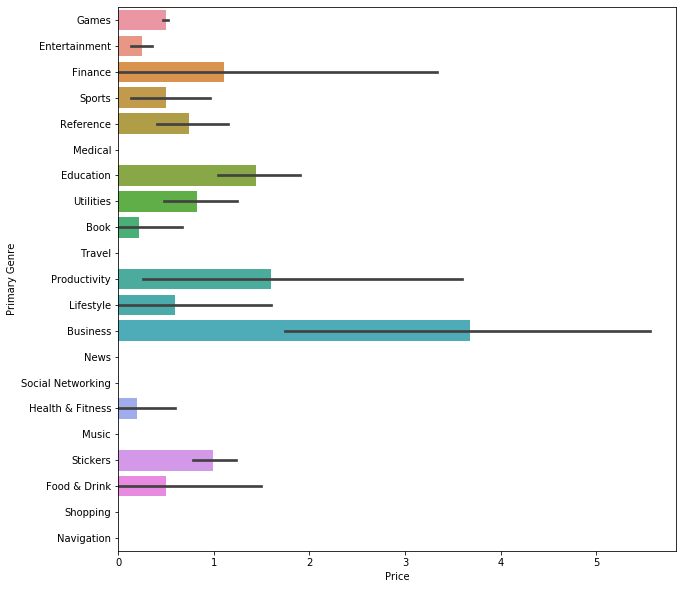

In [27]:
plt.figure(figsize = (10,10))
sns.barplot(y = "Primary Genre", x = "Price", data = data)
plt.show()

As we can see, Business and Productivity based Apps have the most Price

## Relation between separate Genres and Price

In [28]:
def find_mean_price(df, genre, mean_col):
    prices = df[mean_col][df[genre] == 1]
    avg_price = np.mean(prices)
    return avg_price

In [29]:
genre_to_price_map = {}
for g in unique_genres:
    genre_to_price_map[g] = find_mean_price(data, g, 'Price')

print(genre_to_price_map)

{'Action': 0.3074900398406375, 'Adventure': 0.3666786570743406, 'Animals & Nature': 0.99, 'Art': 0.495, 'Board': 1.1158163858221963, 'Books': 0.47210526315789475, 'Business': 1.818444444444444, 'Card': 0.47606824925816027, 'Casino': 0.30573333333333336, 'Casual': 0.20410999408633942, 'Comics & Cartoons': 0.495, 'Education': 1.0279684210526314, 'Emoji & Expressions': 1.1253333333333333, 'Entertainment': 0.4100050125313283, 'Family': 0.2627425614489004, 'Finance': 0.94, 'Food & Drink': 0.3319298245614035, 'Games': 0.5134346110816699, 'Gaming': 0.9919999999999999, 'Health & Fitness': 0.26323529411764707, 'Kids & Family': 0.66, 'Lifestyle': 0.18081818181818182, 'Magazines & Newspapers': 0.0, 'Medical': 0.28285714285714286, 'Music': 0.32245098039215686, 'Navigation': 0.0, 'News': 0.649, 'People': 0.9899999999999999, 'Photo & Video': 0.9184, 'Places & Objects': 0.99, 'Productivity': 0.675, 'Puzzle': 0.31521091184642586, 'Racing': 0.3399224806201551, 'Reference': 1.2708333333333333, 'Role Pla

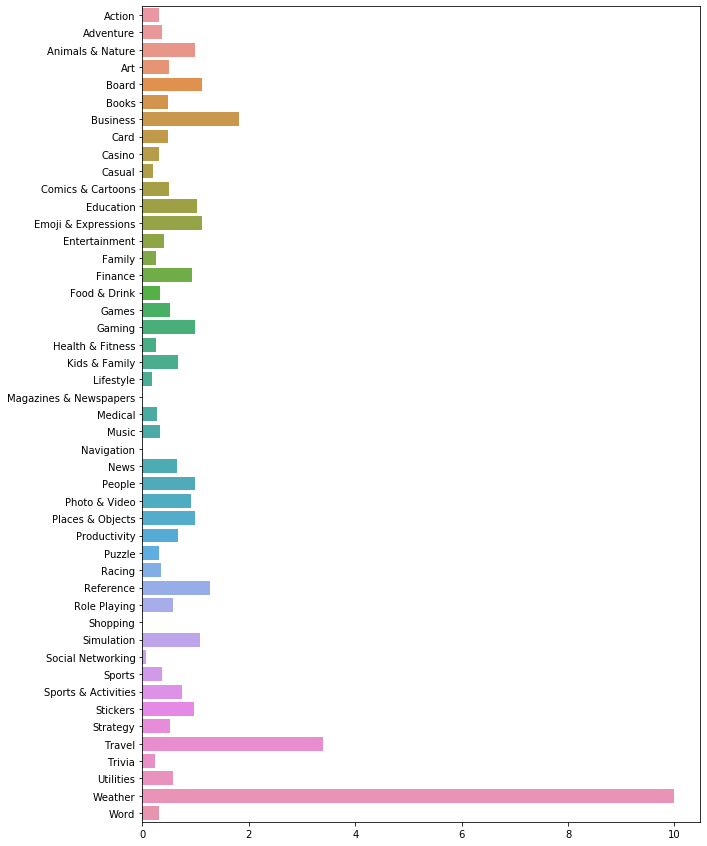

In [30]:
plt.figure(figsize = (10, 15))
sns.barplot(list(genre_to_price_map.values()), list(genre_to_price_map.keys()))
plt.show()

From the above plot, it is clear that Weather and Travel based apps have the highest price, even though there was only one app in the Weather Genre, and so this can easily be considered as an outlier.